# **Задача выдачи кредита**  
### Работу выполнил Подлевских Дмитрий 11-808
### На основе данных помочь определить банку, может ли данный клиент получить определенный кредит

Подключаем библиотеки для работы с данными

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

##### ***Описание датасета:***
Loan id - идентификатор займа  
Customer id - идентификатор пользователя  
Loan status - статус займа: полностью оплатит, не оплатит   
Current loan amount - сумма текущего кредита  
Term - срок: длинный, короткий  
Credit score - счет кредита  
Annual income - годовой доход  
Years in current job - количество лет работы на текущем предприятии  
Home ownership - тип владения домом: кредит, аренда, собственный дом  
Purpose - цель кредита: оплата долга, обустройство дома, другое  
Monthly debt - ежемесячный долг  
Years of credit history - количество лет кредитной истории  
Month since last delinquent - число месяцев с последнего правонарушения  
Number of open accounts - количество открытых счетов  
Number of credit problem - число проблем с кредитом  
Current credit balance - текущий кредитный баланс  
Maximum open credit - максимальная сумма открытого кредита  
Bankruptices - число банкротств  
Tax liens - налоговый залог

##### Считаем данные, посмотрим первые пять строк

In [137]:
data = pd.read_csv("credit_train.csv")

In [176]:
data.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,0,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,1,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


##### Нормализуем выборку:
Потому как Loan Status переменная бинарная, имеющая всего два допустимых значения: полностью оплачена или нет, заменим для удобства значения переменной на 1 и 0, где 1 - оплачена, 0 - списывается.

In [139]:
def getnumber(status):
    if(status == "Fully Paid"):
        return 1
    else:
        return 0
    
data['Loan Status'] = data['Loan Status'].apply(getnumber)
data1 = data.iloc[:, 0:19]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Исходя из описания датасета, можно удалить столбцы, которые никак не повлияют на наш анализ:
Идентификаторы, число лет работы на текущем предприятии, цель выдачи, тип владения домом, срок выдачи, статус заявки  

In [140]:
newdata = data1.drop(['Loan ID', 'Customer ID', 'Purpose', 'Years in current job', 'Home Ownership', 'Term'], axis = 1)
newdata

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,709.0,1167493.0,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,NaN,NaN,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,721.0,806949.0,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,NaN,NaN,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Заменяем null на среднее в тех столбцах, где есть miss values:

In [141]:
mean1 = newdata['Credit Score'].mean()
mean2 = newdata['Annual Income'].mean()
mean3 = newdata['Months since last delinquent'].mean()
mean4 = newdata['Bankruptcies'].mean()
mean5 = newdata['Tax Liens'].mean()
mean6 = newdata['Maximum Open Credit'].mean()
mean7 = newdata['Current Loan Amount'].mean()
mean8 = newdata['Monthly Debt'].mean()
mean9 = newdata['Years of Credit History'].mean()
mean10 = newdata['Number of Open Accounts'].mean()
mean11 = newdata['Number of Credit Problems'].mean()
mean12 = newdata['Current Credit Balance'].mean()

newdata['Credit Score'] = newdata['Credit Score'].fillna(value = mean1)
newdata['Annual Income'] = newdata['Annual Income'].fillna(value = mean2)
newdata['Months since last delinquent'] = newdata['Months since last delinquent'].fillna(value = mean3)
newdata['Bankruptcies'] = newdata['Bankruptcies'].fillna(value = mean4)
newdata['Tax Liens'] = newdata['Tax Liens'].fillna(value = mean5)
newdata['Maximum Open Credit'] = newdata['Maximum Open Credit'].fillna(value = mean6)
newdata['Current Loan Amount'] = newdata['Current Loan Amount'].fillna(value = mean7)
newdata['Monthly Debt'] = newdata['Monthly Debt'].fillna(value = mean8)
newdata['Years of Credit History'] = newdata['Years of Credit History'].fillna(value = mean9)
newdata['Number of Open Accounts'] = newdata['Number of Open Accounts'].fillna(value = mean10)
newdata['Number of Credit Problems'] = newdata['Number of Credit Problems'].fillna(value = mean11)
newdata['Current Credit Balance'] = newdata['Current Credit Balance'].fillna(value = mean12)
newdata.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

##### Заменив null на среднее значение, удалим дублирующие строки в датасете

In [142]:
newdata.drop_duplicates(subset = ['Current Loan Amount', 'Tax Liens'], keep = False)

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
23,1,91894.0,724.000000,8.503830e+05,5860.74,17.5,34.901321,7.0,0.0,95608.0,230626.0,0.0,0.0
38,0,259842.0,1076.456089,1.378277e+06,11792.73,20.6,34.000000,9.0,0.0,401584.0,708818.0,0.0,0.0
40,0,688468.0,682.000000,1.494616e+06,14697.07,16.6,50.000000,8.0,0.0,343995.0,843854.0,0.0,0.0
63,1,602008.0,741.000000,2.896721e+06,48278.62,19.6,32.000000,17.0,0.0,5246261.0,11887678.0,0.0,0.0
65,0,523908.0,7370.000000,1.028774e+06,22632.99,19.3,34.901321,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99932,1,481250.0,747.000000,2.267004e+06,14187.68,16.0,34.901321,6.0,0.0,398050.0,569008.0,0.0,0.0
99938,1,90398.0,735.000000,8.550380e+05,6583.69,16.5,28.000000,4.0,0.0,9861.0,32274.0,0.0,0.0
99950,0,486046.0,695.000000,1.440827e+06,33979.22,33.5,9.000000,18.0,0.0,633631.0,937024.0,0.0,0.0
99966,1,100254.0,705.000000,1.032004e+06,20124.04,20.0,34.901321,4.0,0.0,354065.0,468006.0,0.0,0.0


##### Определим Х - данные, на которых будет обучаться модель, и Y, определяющий, правильно ли обучилась модель, target переменная

In [143]:
X = newdata.drop(['Loan Status'], axis = 1)
Y = newdata['Loan Status']
newdata

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,4.454120e+05,709.000000,1.167493e+06,5214.740000,17.200000,34.901321,6.00000,1.00000,228190.00000,416746.000000,1.00000,0.000000
1,1,2.623280e+05,1076.456089,1.378277e+06,33295.980000,21.100000,8.000000,35.00000,0.00000,229976.00000,850784.000000,0.00000,0.000000
2,1,1.000000e+08,741.000000,2.231892e+06,29200.530000,14.900000,29.000000,18.00000,1.00000,297996.00000,750090.000000,0.00000,0.000000
3,1,3.476660e+05,721.000000,8.069490e+05,8741.900000,12.000000,34.901321,9.00000,0.00000,256329.00000,386958.000000,0.00000,0.000000
4,1,1.762200e+05,1076.456089,1.378277e+06,20639.700000,6.100000,34.901321,15.00000,0.00000,253460.00000,427174.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,0,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.16831,294637.38235,760798.381748,0.11774,0.029313
100510,0,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.16831,294637.38235,760798.381748,0.11774,0.029313
100511,0,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.16831,294637.38235,760798.381748,0.11774,0.029313
100512,0,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.16831,294637.38235,760798.381748,0.11774,0.029313


##### Отрегулировав датасет, сбалансируем выборку, сохранив данные в новый csv-файл:

In [144]:
newdata.to_csv("update_credit_train.csv")

##### Выделяем на тестирование 30% данных, остальное будем обучать:

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

##### Выберем лучшую модель для нашего решения.

Начнем с Decision Tree. Структура дерева представляет следующее:  

Бинарное дерево. В каждой вершине записано условие, в листьях записаны значения целевой функции.  

В данном случае строится с помощью алгоритма CART:выбор атрибута происходит на основании критерия Джини.  

Алгоритм берет все неиспользованные признаки и считает их энтропию относительно тестовых образцов. Затем выбирает признак, для которого энтропия минимальна (а информационная выгода соответственно максимальна), делает узел, содержащий этот признак.

Ограничим глубиной 10, чтобы избежать переобучения дерева, затем с помощью pred_proba получаем прогноз на тестовой выборке.
Затем заранее получаем вычислтельные характеристики и площадь для ROC-AUC метрики, чтобы выяснить, какая доля предсказана неверно. 

Затем составляем отчет по дереву решений


In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier(max_depth = 10)
tree_simple = tree.fit(X_train, Y_train)
pred_proba = tree_simple.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, pred_proba)
auc = metrics.roc_auc_score(Y_test, pred_proba)
predictions = tree_simple.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.23      0.37      7022
           1       0.81      0.99      0.89     23133

    accuracy                           0.82     30155
   macro avg       0.86      0.61      0.63     30155
weighted avg       0.83      0.82      0.77     30155



Выведем на экран результат построения

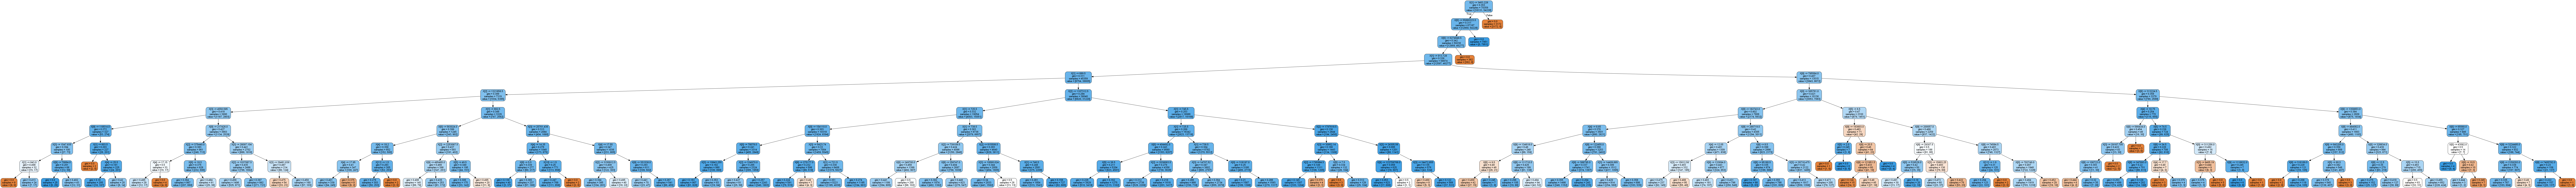

In [102]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import subprocess

export_graphviz(tree_simple, out_file='Decision_tree.dot', 
               rounded = True, proportion = False, filled = True)

import pydot 
(graph, ) = pydot.graph_from_dot_file('Decision_tree.dot')

graph.write_png('Decision_tree.png')
Image(filename = 'Decision_tree.png')

Строим Random Forest. Случайные леса создают деревья решений, получают прогнозы по каждому дереву, выбирают лучшее с помощью голосования.

Алгоритм:
Выбираются случайные выборки из набора данных.
Создается дерево решений для каждой выборки, вычисляется прогноз для каждого.
Проводится голосование за каждый прогнозируемый результат
Результатом будет тот результат, имеющий наибольшее количество голосов в окончательном варианте.

При построении используем критерий энтропии, который основывается на количестве информации в каждой вершине дерева, 
где идет сравнение по критерию энтропии до появления нового условия и после.

Затем задаем параметры построения (глубины и количества деревьев), используем GridSearchTv для нахождения лучшего дерева по параметрам.
Обучим модель на наших данных, затем найдем лучшее дерево                                                                                                                                       

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tree = RandomForestClassifier(criterion = 'entropy')
parametrs = {'max_depth':range(1,100, 10), 'n_estimators':range(1,100, 10)}
grid = GridSearchCV(clf, parametrs, cv = 5, scoring = 'roc_auc', n_jobs = -1)
tree_random = grid.fit(X_train, Y_train)
best_tree_random = grid.best_estimator_
best_tree_random

С помощью pred_proba получаем прогноз на тестовой выборке.
Затем заранее получаем вычислтельные характеристики и площадь для ROC-AUC метрики, чтобы выяснить, какая доля предсказана неверно. 

Затем составляем отчет по Random Forest

In [150]:
pred_proba = best_tree_random.predict_proba(X_test)[::,1]
fpr_random, tpr_random, _ = metrics.roc_curve(Y_test, pred_proba)
auc_random = metrics.roc_auc_score(Y_test, pred_proba)
predictions = best_tree_random.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.24      0.38      7022
           1       0.81      0.99      0.89     23133

    accuracy                           0.82     30155
   macro avg       0.86      0.62      0.63     30155
weighted avg       0.84      0.82      0.77     30155



Строим Линейную и Логистическую регрессии в программе SAS Enterprise Miner.

Линейная регрессия - моель зависимости переменной х от одной или нескольких других переменных с линейной функцией зависимости.

Логистическая регрессия - модель, при которой значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.

Для начала с помощью команды Data Input загружаем данные, обрабатывать их не нужно, потому что мы их обработали в тьюториале, затем разделяем данные на две части - Train и Validation по 50% данных. Далее строим следующие виды регрессий:
Linear Stepwise - линейная, использует метод Stepwise, которые удаляет и добавляет переменные на основе их значимости
Logistic Stepwise - логистическая, использует Stepwise
Linear Forward Validation Error -  линейная, использует метод Forward, который добавляет наиболее значимые переменные, строится на ошибках валидации
Logistic Backward Validation Error - логистическая, использует метод Backward, который удаляет наименее значимые переменные, модель строится на ошибках валидации.

После построения стравниваем модели, вывдоим отчет. Результат построения выведен на экран, продемонстрированы roc-кривые четырех моделей.

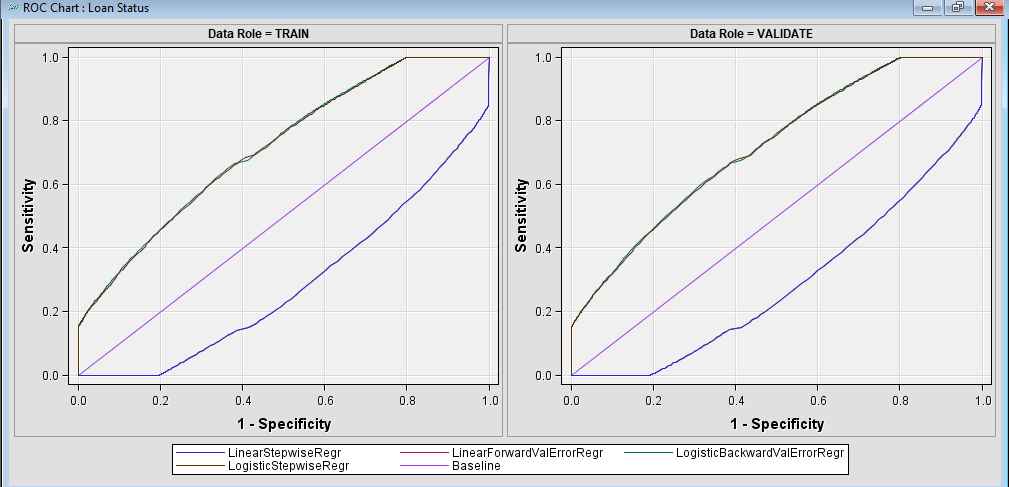

In [160]:
Image(filename = 'Regression_ROC.png')

Построим Roc-кривые для оставшихся моделей: Дерево решений и Случайный Лес.

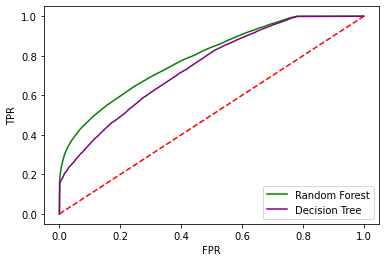

<function matplotlib.pyplot.show(*args, **kw)>

In [174]:
plt.plot(fpr_random, tpr_random, 'b', color='g', label = 'Random Forest' % auc_random)
plt.plot(fpr, tpr, 'b', color='purple', label = 'Decision Tree' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid(False)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.savefig('roc.png')
plt.show()
plt.show

## Вывод:

Благодаря графикам, мы увидели результат работы моделей. Самая лучшая регрессионная модель - Linear Forward Vallidation Error, потому что ее средняя квадратическая ошибка равна 0.14373. Сравнивая эту модель с деревом решений и случайным лесом, получим, что лучшей моделью является Random Forest, потому как у нее наибольшая площадь под кривой. На мой взгляд, это связано с тем, что у алгоритма большой размер получающихся моделей, следовательно, болше шансов получить наилучшую. Доля верно классифицированных примеров среди всех (accuracy), которая вычисляется по формуле: (TP + TN)/(TP + TN + FP + FN) равна 82%, по моему мнению, это достаточно хороший показатель. 

Касательно данных, стало понятно, что есть переменные, которые не влияют на результат, напримр: цель, тип владения домом, количество лет работы на текущем предприятии.
Помимо этого, можно выделить три переменные, которые значительно влияют на результат: количество открытых счетов на данный момент и число месяцев с последнего правонарушения. Как правило, чем меньше число месяцев с последнего правонарушения, тем меньше шансов, что результат Loan Status будет равен 1. Этот же результат будет выведен при большом количестве открытых счетов, однако если последнее правонарушение было зафиксировано более, чем 2 года назад и текущая сумма долга невелика, то резуьтат будет равен 1.

### Используемые ресурсы:
https://habr.com/ru/post/457302/ - статья на хабре для создания фичи анализа данных  
https://python-scripts.com/ - библиотека необходимых команд Python  
Материалы лекций